In [1]:
import numpy as np
import matplotlib.pyplot as plt
from arc import Arc
from losange import Losange
import os
os.chdir(os.path.dirname(os.path.abspath('__file__')))

import jax.numpy as jnp

In [2]:
center = 200
wid = 200
hei = 300
b_border = 350
base = (b_border, center)
left = (b_border -100, center-int(wid/2))
right = (b_border -100, center+int(wid/2))
top = (b_border - hei, center)
lcenter = (390, 100)
rcenter = (390, 300)
arc = Arc(lcenter, top_point=left, bottom_point=base)
img = np.ones((400, 400, 3), dtype = "uint8") * 255

In [9]:
x_range = jnp.arange(-arc.a, arc.a + 1)
xmax = max(arc.tp[0],arc.bp[0])
xmin = min(arc.tp[0],arc.bp[0])
ymax = max(arc.tp[1],arc.bp[1])
ymin = min(arc.tp[1],arc.bp[1])
x_in_bounds = (x_range + arc.center[0] <= xmax) & (x_range + arc.center[0] >= xmin)
x_range = x_range[x_in_bounds]
y_range = jnp.arange(-arc.b, arc.b + 1)
y_in_bounds = (y_range + arc.center[1] <= ymax) & (y_range + arc.center[1] >= ymin)
y_range = y_range[y_in_bounds]

In [11]:
yp = arc.b * jnp.sqrt(1 - (x_range/arc.a)**2)
ym = -yp


Array([ 0.      , 12.408147, 17.516329, 21.4144  , 24.682535, 27.545881,
       30.1201  , 32.47399 , 34.652508, 36.686916, 38.6     , 40.40897 ,
       42.12727 , 43.765564, 45.332558, 46.83536 , 48.28    , 49.67154 ,
       51.014336, 52.312126, 53.568188, 54.7854  , 55.966286, 57.113106,
       58.227867, 59.31238 , 60.368286, 61.39704 , 62.399998, 63.378384,
       64.33332 , 65.26582 , 66.17685 , 67.06729 , 67.937935, 68.789536,
       69.622795, 70.43837 , 71.23686 , 72.01884 , 72.784836, 73.53536 ,
       74.27086 , 74.99179 , 75.69856 , 76.39158 , 77.07121 , 77.73779 ,
       78.39167 , 79.033165, 79.66255 , 80.28014 , 80.88619 , 81.48097 ,
       82.0647  , 82.63764 , 83.200005, 83.752   , 84.29383 , 84.8257  ,
       85.347786, 85.860275, 86.363335, 86.857124, 87.341805, 87.81753 ,
       88.28444 , 88.74267 , 89.19236 , 89.63365 , 90.06664 , 90.49147 ,
       90.90823 , 91.317055, 91.71804 , 92.11129 , 92.4969  , 92.87497 ,
       93.24559 , 93.60884 , 93.96482 , 94.31361 , 

In [12]:
xp = arc.a * jnp.sqrt(1 - (y_range/arc.b)**2)
xm = -xp



In [24]:
# get the x_range, yp pairs for yp in y_range
yp_in_bounds = (yp + arc.center[1] <= ymax) & (yp + arc.center[1] >= ymin)
yp_pairs = jnp.array([x_range, yp]).T[yp_in_bounds]
# get the x_range, ym pairs for ym in y_range
ym_in_bounds = (ym + arc.center[1] <= ymax) & (ym + arc.center[1] >= ymin)
ym_pairs = jnp.array([x_range, ym]).T[ym_in_bounds]

# get the x_range, yp pairs for yp in y_range
xp_in_bounds = (xp + arc.center[0] <= xmax) & (xp + arc.center[0] >= xmin)
xp_pairs = jnp.array([x_range, xp]).T[xp_in_bounds]
# get the x_range, ym pairs for ym in y_range
xm_in_bounds = (xm + arc.center[0] <= xmax) & (xm + arc.center[0] >= xmin)
xm_pairs = jnp.array([x_range, xm]).T[xm_in_bounds]

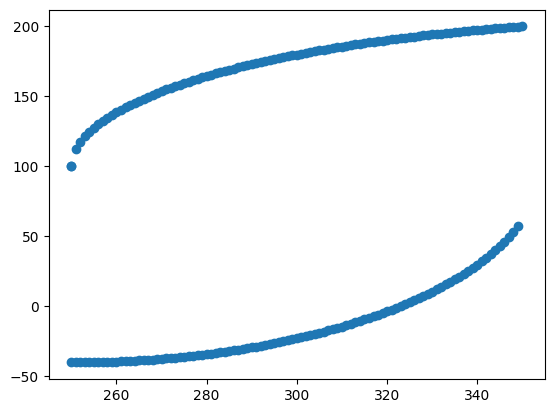

In [32]:
# merge the content of yp_pairs, ym_pairs, xp_pairs, xm_pairs such that there are no duplicate points
merged_pairs = jnp.concatenate([yp_pairs, ym_pairs, xp_pairs, xm_pairs])
# sort the merged_pairs such that the x values are in ascending order
merged_pairs = merged_pairs[merged_pairs[:, 0].argsort()]
# add the center point to the merged_pairs
merged_pairs = merged_pairs + jnp.array(arc.center)

plt.plot(merged_pairs[:, 0], merged_pairs[:, 1], 'o')
plt.show()



In [25]:
print(yp_in_bounds.sum())
print(ym_in_bounds.sum())
print(xp_in_bounds.sum())
print(xm_in_bounds.sum())

101
1
0
100


In [33]:
jnp.array(arc.center)

Array([390, 100], dtype=int32)